# Multiple Linear Regression

## Step 1: Reading and Understanding the data

#### Import all required libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

####  Import car prices data into pandas dataframe

In [3]:
# import car price data into dataframee

cars_data = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset

cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Inspect the various aspects of the car price data



In [5]:
# Shape

cars_data.shape

(205, 26)

In [6]:
# Describe

cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Info

cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### Luckily we do not have any missing values, Let's confirm again if there are any missing values by seeing percentage of missing values in each column

In [8]:
# As you can see we do not have any missing values

round(cars_data.isnull().sum()/len(cars_data.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

## Step 2: Data Preparation


In [9]:
# There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' 
# and the second is the 'car model'. 
# For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. 
# So wo need to consider only company name as the independent variable for model building.
# Lets take out company name from the columns 'CarName'

companyname = cars_data['CarName'].apply(lambda x : x.split(' ')[0])
cars_data.insert(3,"companyname", companyname)
cars_data.drop(['CarName'],axis=1,inplace=True)
cars_data.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Now if you look at the head dataset from the previous head dataset, we have got only company name out of combination of both company name and model

In [10]:
# Drop if there are any duplicates

cars_data = cars_data.drop_duplicates()

cars_data.loc[cars_data.duplicated()]


,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


Looks clean, no duplicates

### Look at all the columns and check if there are any errors and spell mistakes

In [11]:
cars_data.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

List of car company names are referred from the wikipedia link - https://en.wikipedia.org/wiki/List_of_automobile_manufacturers

As we can see there are miss spells in brand names and duplicate names due to upper and lower cases

For example there is brand name 'toyota' and 'toyouta', if you look at the wiki, there is no brand called toyouta. There is brand name 'Nissan' as well as 'nissan', we can safely combine them to unite the data.

In [12]:
# Lets make it all lower case

cars_data.companyname = cars_data.companyname.str.lower()
cars_data.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We have got 'Nissan' and 'nissan' corrected.

In [13]:
# Lets fix the spell errors

cars_data.companyname.replace('toyouta', 'toyota', inplace=True)
cars_data.companyname.replace('alfa-romero', 'alfa romeo', inplace=True)
cars_data.companyname.replace('maxda', 'mazda', inplace=True)
cars_data.companyname.replace('porcshce', 'porsche', inplace=True)
cars_data.companyname.replace('vokswagen', 'volkswagen', inplace=True)
cars_data.companyname.replace('vw', 'volkswagen', inplace=True)

cars_data.companyname.unique()

array(['alfa romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Now we can see all the brand names are corrected as per their original names taken from wiki

Issues with column 'companyname' are fixed. We have a clean dataset now.

In [14]:
cars_data.columns

Index(['car_ID', 'symboling', 'companyname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Step 3: Visualizing the Data


Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

###### Note: Building a scotter plot might takes some time

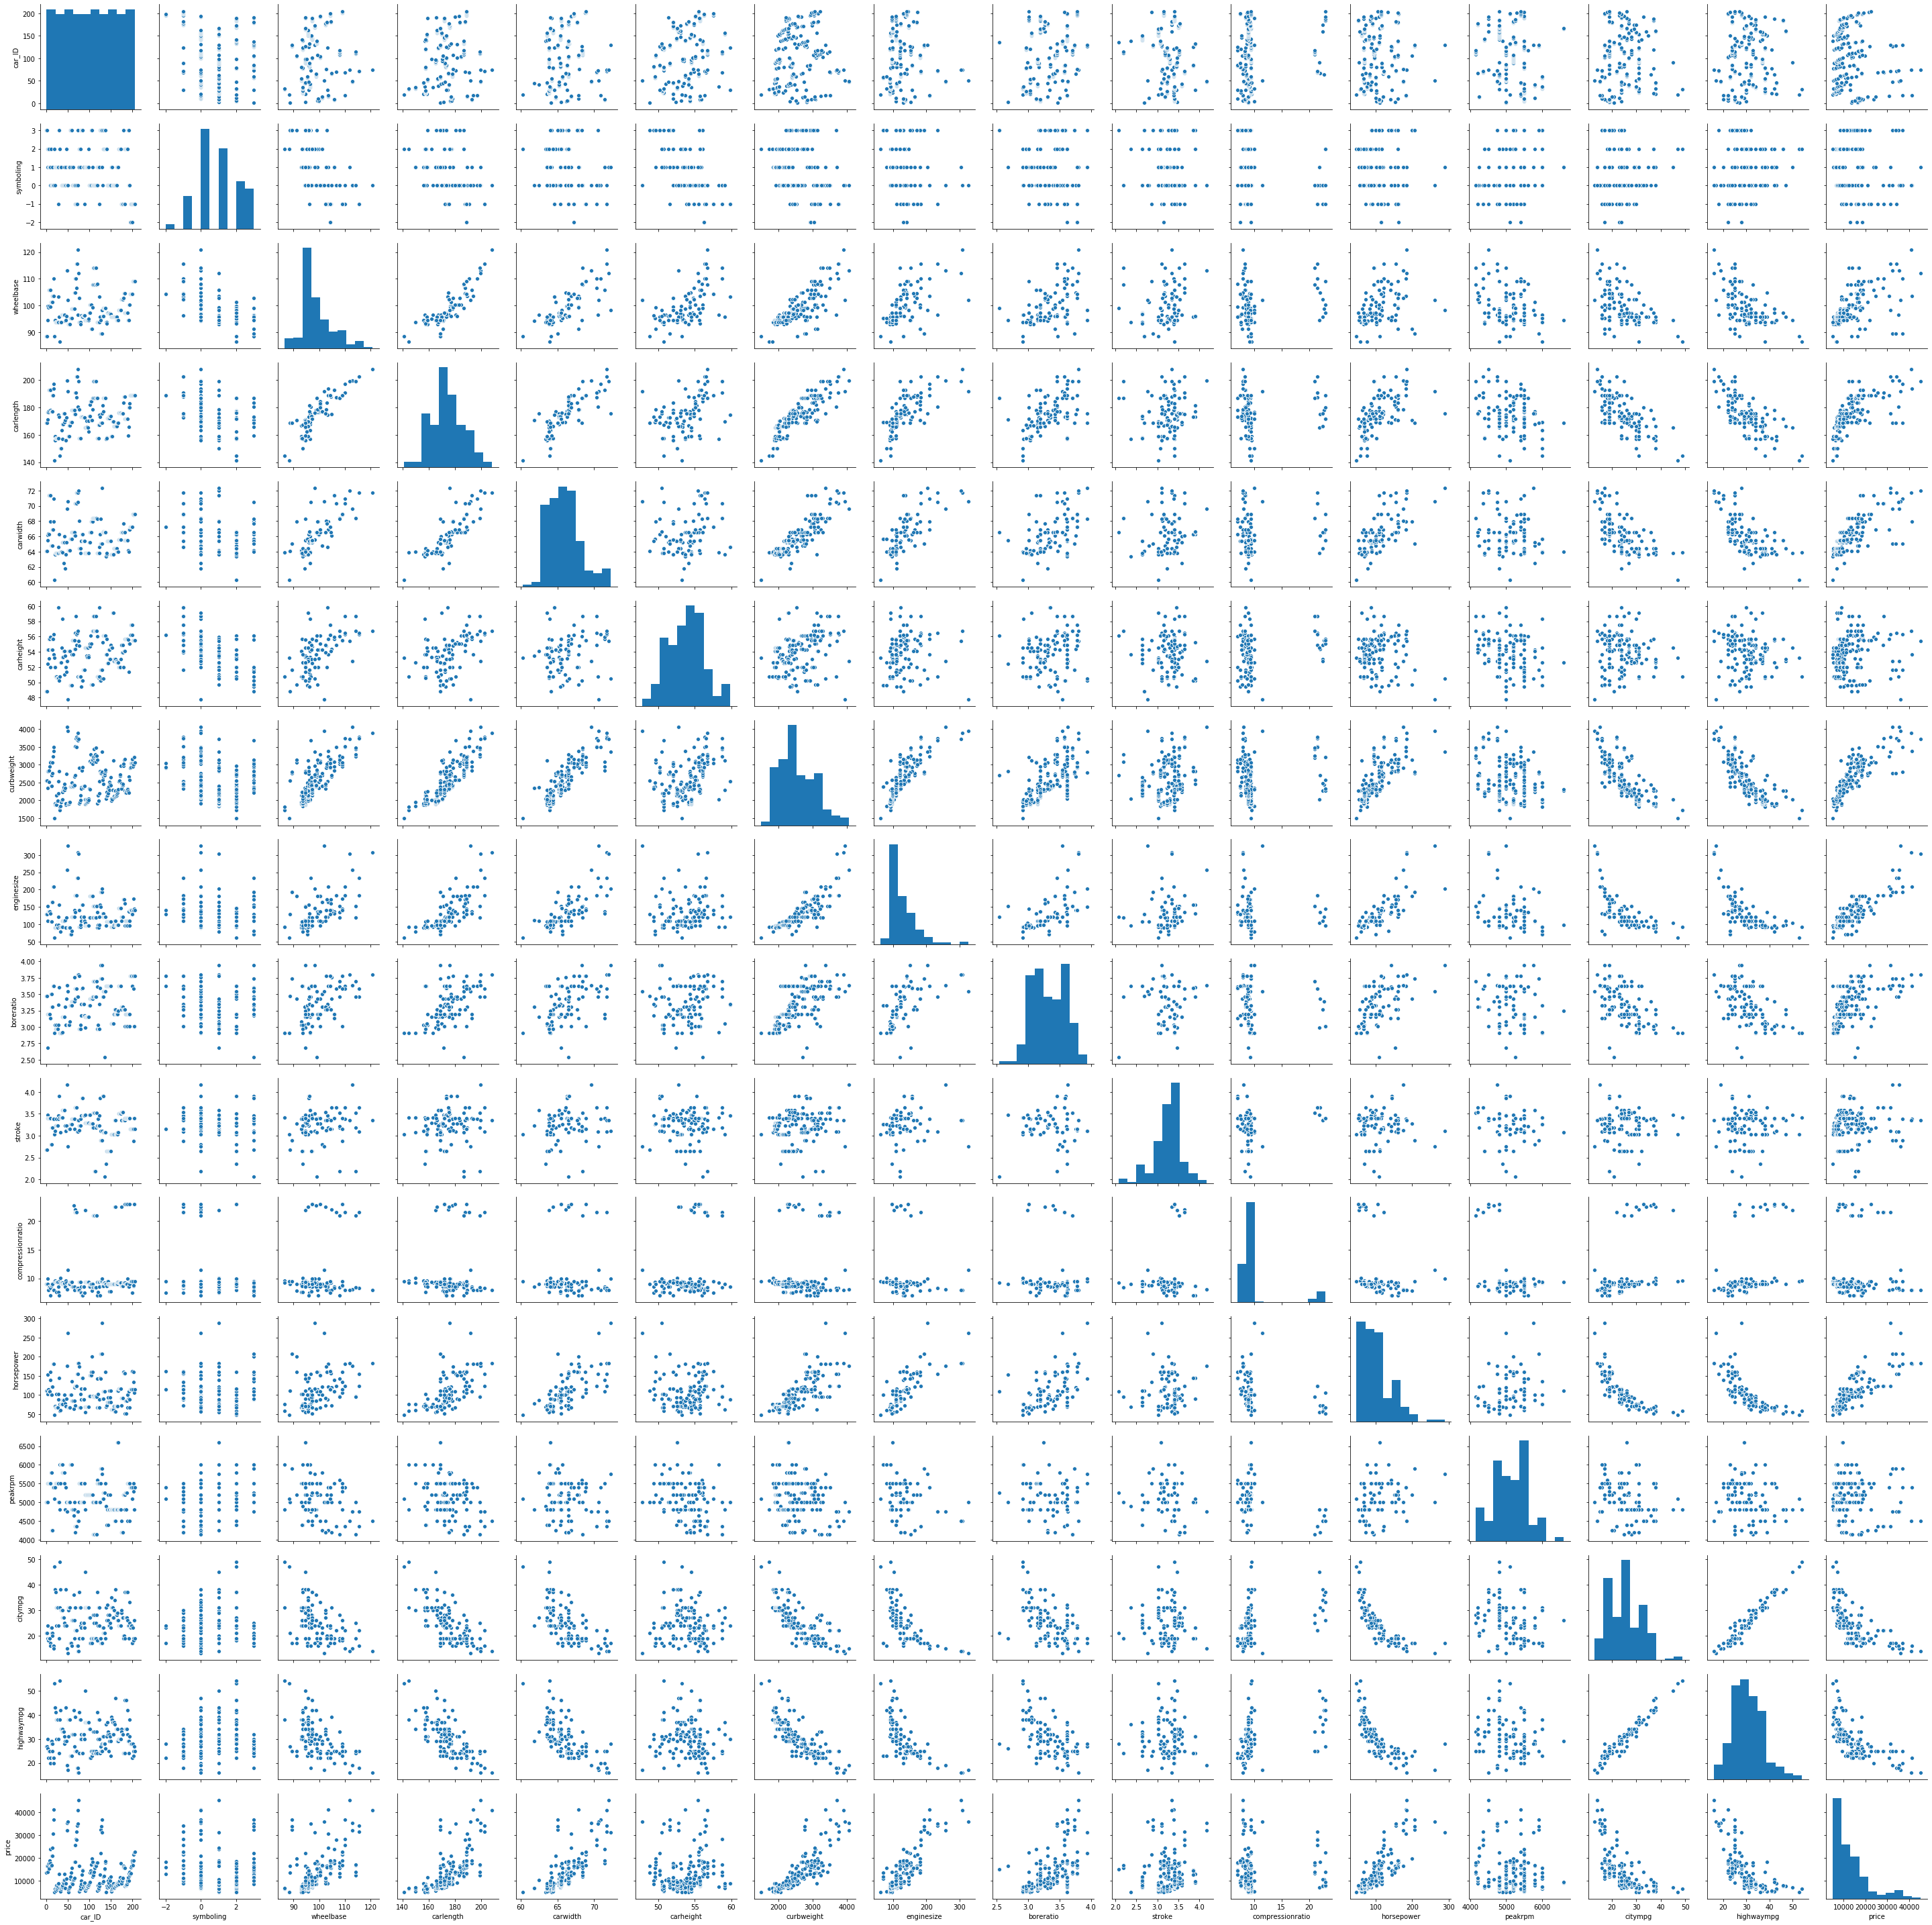

In [15]:
sns.pairplot(cars_data)
plt.show()

##### Now lets look at how the car price is distributed

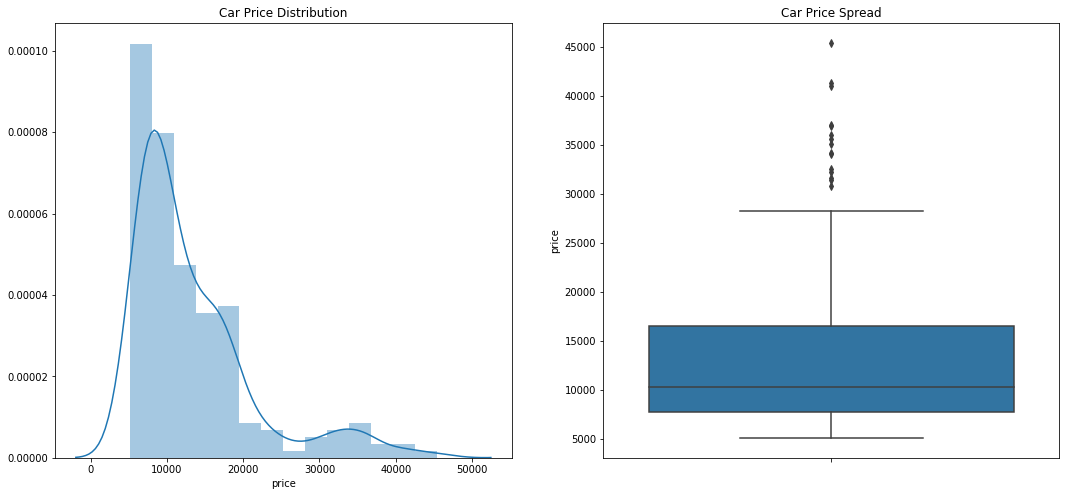

In [16]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution')
sns.distplot(cars_data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars_data.price)

plt.show()

If you look at the above plots, we see that the data is skewed. Meaning there are more cheaper cars than the expensive once. If you look at the botplot, we notice that the most of the car prices are below 16,000

In [17]:
print('Mean:', cars_data.price.mean())
print()
print('Median:',cars_data.price.median())
print()
print('Standard Deviation:',cars_data.price.std())
print()
print('Variance:',cars_data.price.var())

Mean: 13276.710570731706

Median: 10295.0

Standard Deviation: 7988.85233174315

Variance: 63821761.57839796


There is a significant difference between the mean and the median of the price distribution.

Since Mean and Median is not similar, data is skewed as seen in above plots.

In [18]:
cars_data.price.describe()


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

As we can see there high amount of variable in the data distribution

### Visualising Categorical Variables


In [19]:
categorical_variables = ['symboling', 'companyname', 'fueltype','aspiration', 
                         'doornumber','carbody', 'drivewheel', 'enginelocation',
                         'enginetype','cylindernumber','fuelsystem']

print( 'Categorical variables are:')
for cat in categorical_variables:
    print( '-', cat)


Categorical variables are:
- symboling
- companyname
- fueltype
- aspiration
- doornumber
- carbody
- drivewheel
- enginelocation
- enginetype
- cylindernumber
- fuelsystem


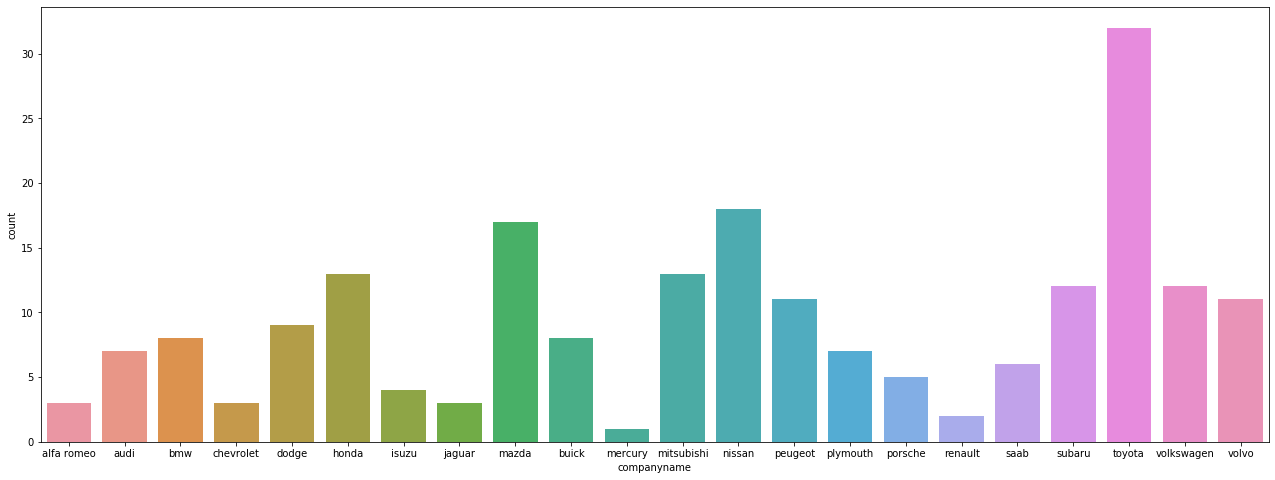

In [20]:
plt.figure(figsize=[22,8])
sns.countplot(cars_data['companyname'])

- Toyota is the most favourite brand in the dataset
- Mercury being the least favourite brand

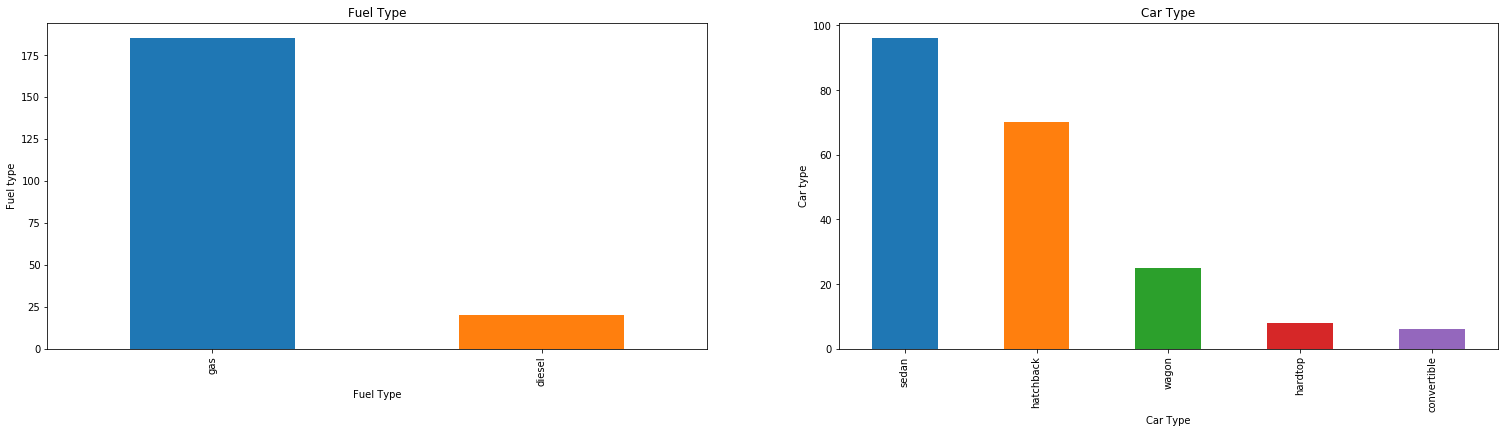

In [21]:
plt.figure(figsize=(26, 6))

plt.subplot(1,2,1)
plt1 = cars_data['fueltype'].value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Fuel type')

plt.subplot(1,2,2)
plt1 = cars_data['carbody'].value_counts().plot('bar')
plt.title('Car Type')
plt1.set(xlabel = 'Car Type', ylabel='Car type')

plt.show()

- There are more petrol cars peferred than the diesel
- There are more Sedan cars preferred and 'covertible' being the least

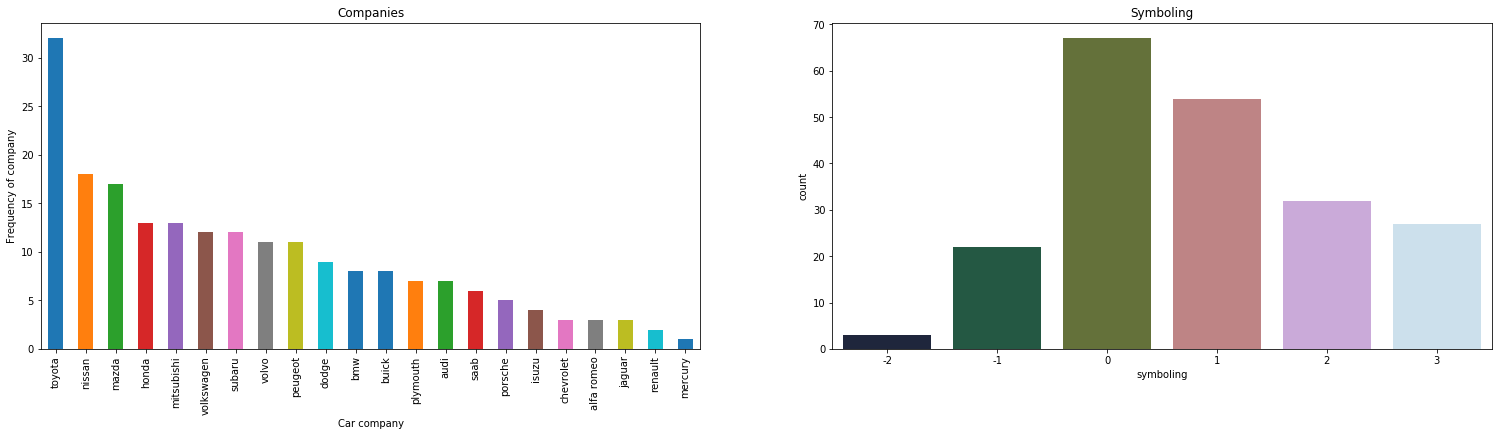

In [22]:
plt.figure(figsize=(26, 6))

plt.subplot(1,2,1)
plt1 = cars_data['companyname'].value_counts().plot('bar')
plt.title('Companies')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,2,2)
plt.title('Symboling')
sns.countplot(cars_data['symboling'], palette=("cubehelix"))

plt.show()

- Toyota is the most sold car brand, Nissan being second highest and mercury being least sold brand.
- Symboling 0 and 1 values have highest number of rows

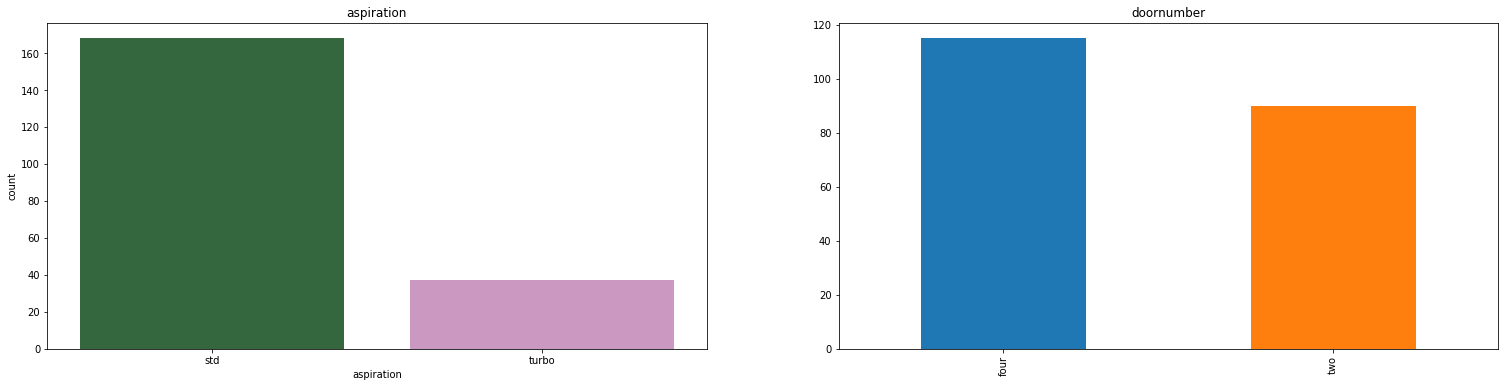

In [23]:
plt.figure(figsize=(26, 6))

plt.subplot(1,2,1)
plt.title('aspiration')
sns.countplot(cars_data['aspiration'], palette=("cubehelix"))

plt.subplot(1,2,2)
plt1 = cars_data['doornumber'].value_counts().plot('bar')
plt.title('doornumber')

plt.show()

- Standard engine are more aspired ones than the Turbo charged engines
- Four door cars are most preferred cars.

### Now lets look at how the how variables are affecting the price

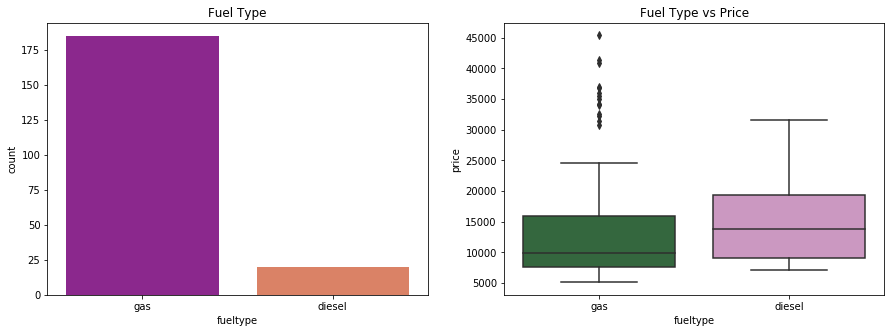

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Fuel Type')
sns.countplot(cars_data['fueltype'], palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=cars_data['fueltype'], y=cars_data['price'], palette=("cubehelix"))

plt.show()

Diesel cars are costier than petrol cars.


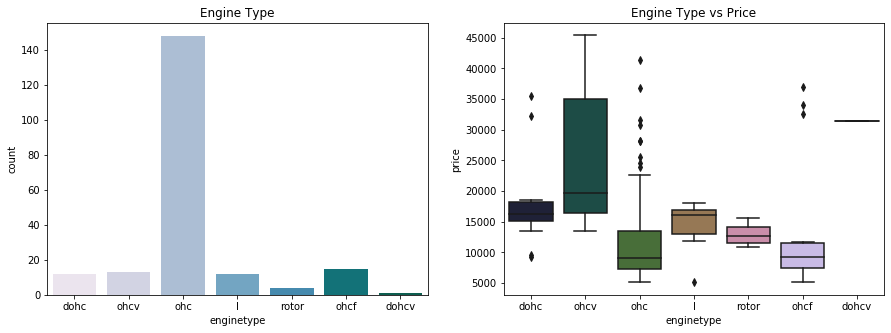

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Engine Type')
sns.countplot(cars_data['enginetype'], palette=("PuBuGn"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars_data['enginetype'], y=cars_data['price'], palette=("cubehelix"))

plt.show()

- ohc engines are most preferred ones
- While the dohcv engine are costlier engines

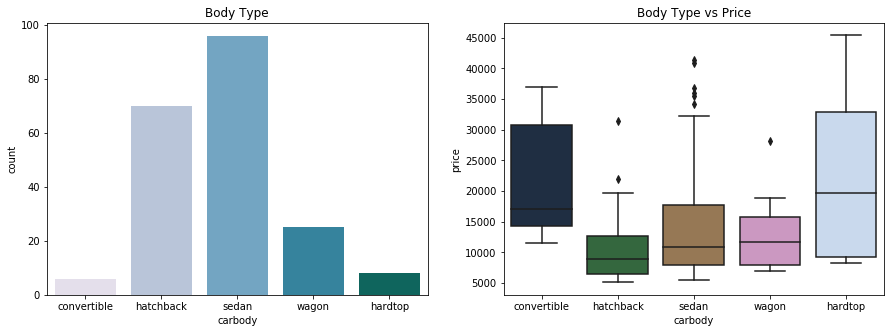

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Body Type')
sns.countplot(cars_data['carbody'], palette=("PuBuGn"))

plt.subplot(1,2,2)
plt.title('Body Type vs Price')
sns.boxplot(x=cars_data['carbody'], y=cars_data['price'], palette=("cubehelix"))

plt.show()

- Sedan cars are the most preferred body types
- Covertible and hardtop are seems to be in the same price range

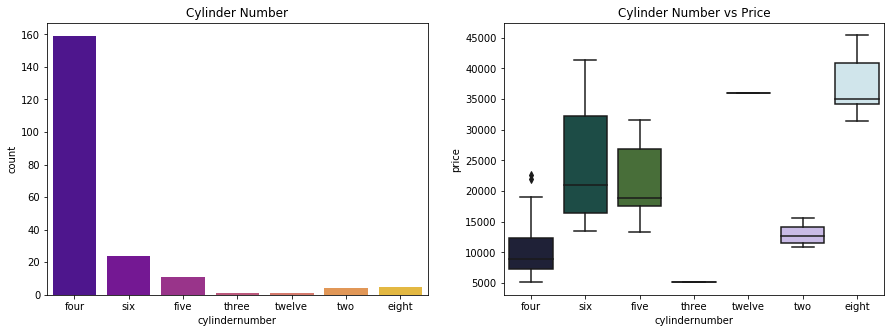

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Cylinder Number')
sns.countplot(cars_data['cylindernumber'], palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Cylinder Number vs Price')
sns.boxplot(x=cars_data['cylindernumber'], y=cars_data['price'], palette=("cubehelix"))

plt.show()

- Four cylinder vehicles are most liked ones
- Eight cylinder vehicles are costlier in thee cylinder number range
- Whilee three cylinder number have the lowest price range

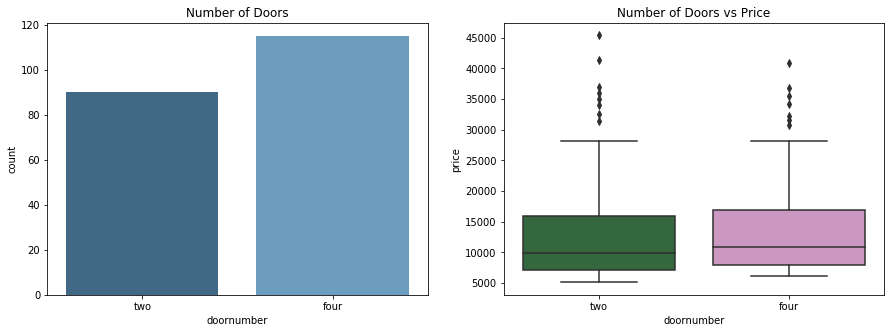

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Number of Doors')
sns.countplot(cars_data['doornumber'], palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Number of Doors vs Price')
sns.boxplot(x=cars_data['doornumber'], y=cars_data['price'], palette=("cubehelix"))

plt.show()

- Four door cars are the most liked cars
- Two and four doors cars are having the same price range between 12000 to 14000, Meaning doornumber variable is not affecting the price much

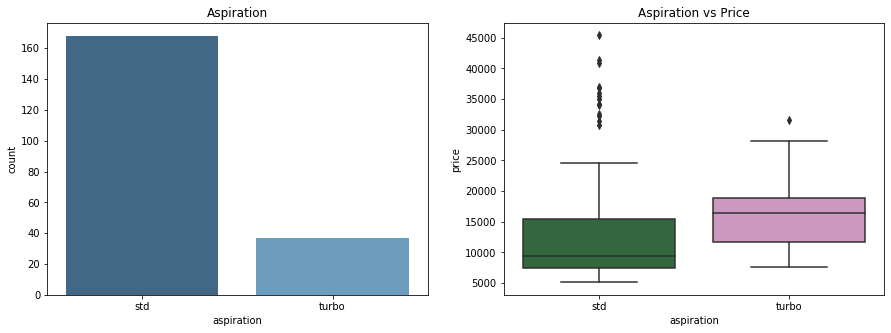

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration')
sns.countplot(cars_data['aspiration'], palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars_data['aspiration'], y=cars_data['price'], palette=("cubehelix"))

plt.show()

Aspiration with turbo have higher price range than the std

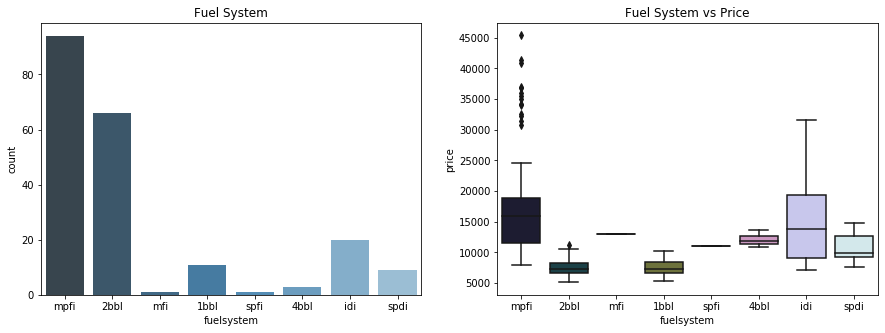

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Fuel System')
sns.countplot(cars_data['fuelsystem'], palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Fuel System vs Price')
sns.boxplot(x=cars_data['fuelsystem'], y=cars_data['price'], palette=("cubehelix"))

plt.show()

- mpfi and 2bbl Fuel Systems are most common preferred ones
- mpfi and idi seem to be higher price range than others


### Visualising Numerical Variables

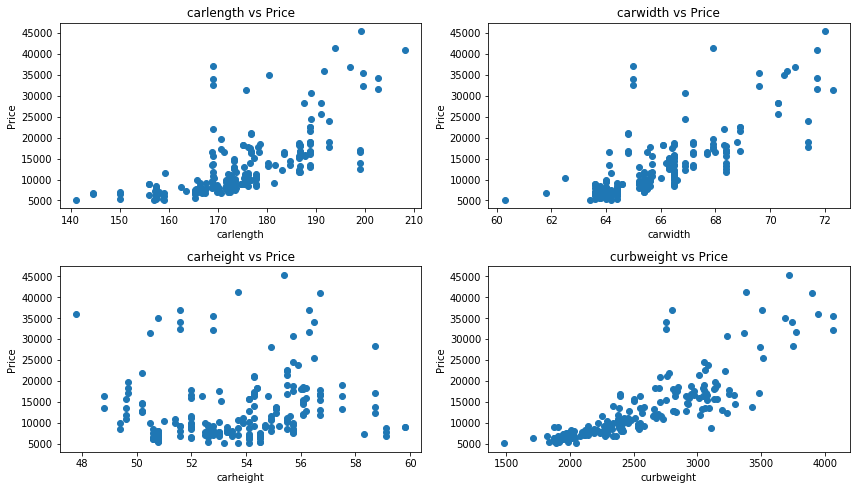

In [31]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    plt.scatter(cars_data[x],cars_data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(12,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

Car Width, Car Length and Curb Weight seems to have a poitive correlation with price.

## Step 4: Data Preparation

#### Lets keep only the significant variables for model building

In [32]:
cars_data.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa romeo,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
cars_data = cars_data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                       'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio',
                       'horsepower', 'carlength','carwidth']]

cars_data.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


#### Creating Dummy Variables

In [34]:
# Function for creating dummy variables

def dummies_var(x, df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the cars_data

cars_data = dummies_var('fueltype', cars_data)
cars_data = dummies_var('aspiration', cars_data)
cars_data = dummies_var('carbody', cars_data)
cars_data = dummies_var('drivewheel', cars_data)
cars_data = dummies_var('enginetype', cars_data)
cars_data = dummies_var('cylindernumber', cars_data)



In [35]:
cars_data.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,1,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,1,0,...,1,0,0,0,1,0,0,0,0,0


## Step 5: Splitting the Data into Training and Testing Sets

### Basic step for regression is performing a train-test split.

In [36]:
np.random.seed(0)
df_train, df_test = train_test_split(cars_data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [37]:
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,1,0,...,1,0,0,0,0,1,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,1,0,...,1,0,0,0,0,1,0,0,0,0
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,1,0,...,0,0,0,0,0,1,0,0,0,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,1,1,...,1,0,0,0,0,1,0,0,0,0


In [39]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.909091,0.181818,...,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.288490,0.387050,...,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


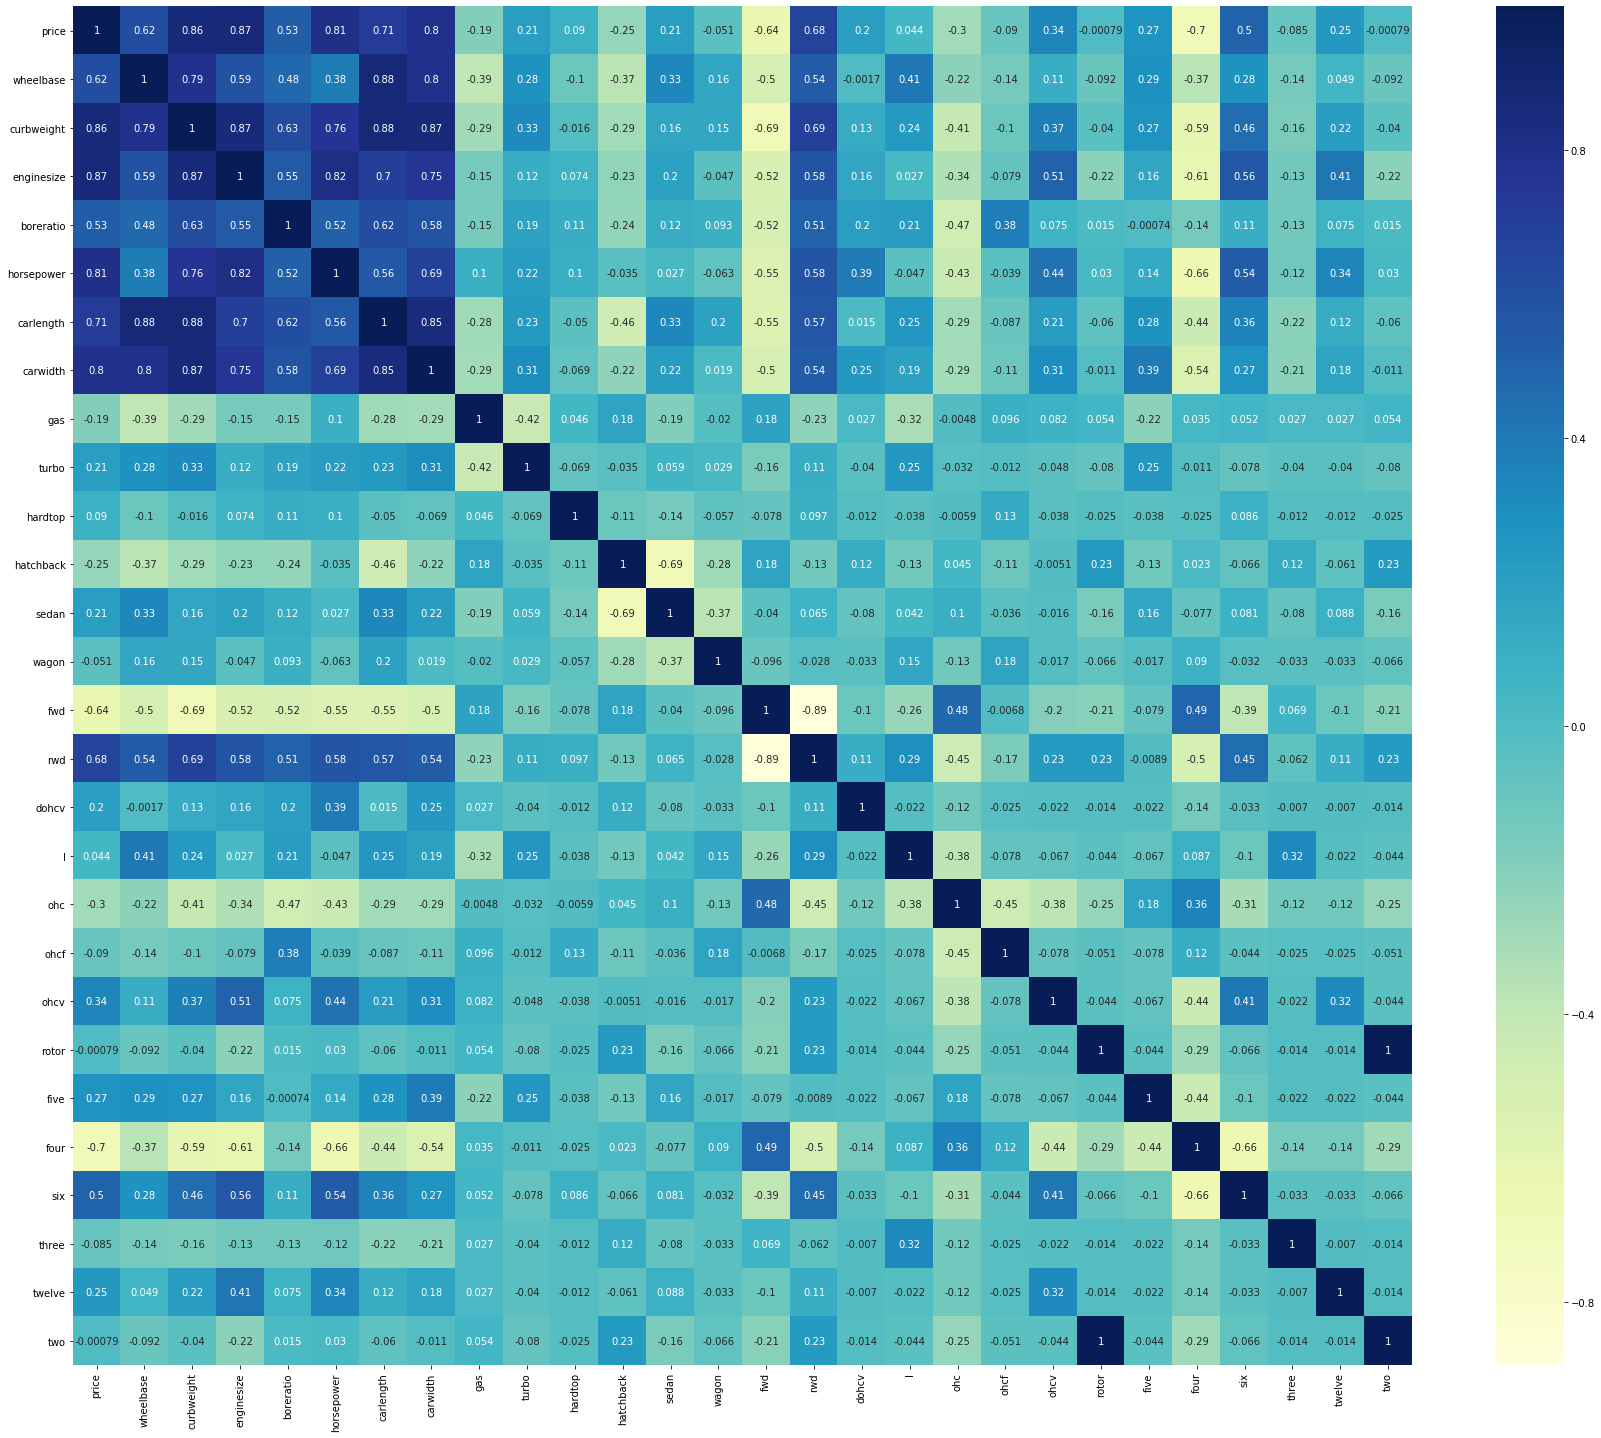

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [41]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

## Step 6: Building a linear model

In [42]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 4),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 14),
 ('horsepower', True, 1),
 ('carlength', False, 2),
 ('carwidth', True, 1),
 ('gas', False, 13),
 ('turbo', False, 16),
 ('hardtop', False, 9),
 ('hatchback', False, 3),
 ('sedan', False, 6),
 ('wagon', False, 5),
 ('fwd', False, 18),
 ('rwd', False, 11),
 ('dohcv', True, 1),
 ('l', False, 15),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', True, 1),
 ('rotor', False, 10),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 17),
 ('twelve', True, 1),
 ('two', False, 12)]

In [44]:
X_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'carwidth', 'dohcv', 'ohcv',
       'five', 'four', 'six', 'twelve'],
      dtype='object')

In [45]:
### Lets build model using Statsmodel

In [46]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,enginesize,horsepower,carwidth,dohcv,ohcv,five,four,six,twelve
122,0.272692,0.139623,0.083333,0.291667,0,0,0,1,0,0
125,0.500388,0.339623,0.395833,0.666667,0,0,0,1,0,0
166,0.314973,0.139623,0.266667,0.308333,0,0,0,1,0,0
1,0.411171,0.260377,0.262500,0.316667,0,0,0,1,0,0
199,0.647401,0.260377,0.475000,0.575000,0,0,0,1,0,0


In [47]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [48]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     89.56
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           8.01e-54
Time:                        22:29:14   Log-Likelihood:                 163.68
No. Observations:                 143   AIC:                            -305.4
Df Residuals:                     132   BIC:                            -272.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0293      0.040      0.725      0.4

In [49]:
checkVIF(X_train_new)

,Features,VIF
0,const,36.44
1,curbweight,8.64
2,enginesize,8.19
4,carwidth,5.66
8,four,5.01
3,horsepower,5.00
9,six,4.54
7,five,2.54
10,twelve,1.94
5,dohcv,1.76


#### We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `curbweight` has a significantly high VIF (8.64) and a high p-value (0.224) as well. Hence, this variable isn't of much use and should be dropped.

In [50]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [51]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     98.98
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.63e-54
Time:                        22:29:14   Log-Likelihood:                 162.88
No. Observations:                 143   AIC:                            -305.8
Df Residuals:                     133   BIC:                            -276.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0278      0.041      0.686      0.4

In [52]:
checkVIF(X_train_new)

,Features,VIF
0,const,36.41
1,enginesize,6.32
7,four,4.97
2,horsepower,4.78
8,six,4.51
3,carwidth,3.57
6,five,2.51
9,twelve,1.83
5,ohcv,1.62
4,dohcv,1.58


Lets also drop dohcv to see the changes as it has higher p-value


In [53]:
X_train_new = X_train_new.drop(["dohcv"], axis = 1)

In [54]:
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     106.3
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.35e-54
Time:                        22:29:14   Log-Likelihood:                 159.53
No. Observations:                 143   AIC:                            -301.1
Df Residuals:                     134   BIC:                            -274.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0253      0.041      0.611      0.5

In [55]:
checkVIF(X_train_new)

,Features,VIF
0,const,36.38
1,enginesize,6.29
6,four,4.80
7,six,3.99
2,horsepower,3.83
3,carwidth,3.57
5,five,2.33
8,twelve,1.74
4,ohcv,1.59


As you notices, variable 'horsepower' has got high p-value and high VIF, lets also drop the same.

In [56]:
X_train_new = X_train_new.drop(["horsepower"], axis = 1)
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     118.6
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.80e-54
Time:                        22:29:14   Log-Likelihood:                 157.59
No. Observations:                 143   AIC:                            -299.2
Df Residuals:                     135   BIC:                            -275.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0467      0.040      1.162      0.2

In [57]:
checkVIF(X_train_new)

,Features,VIF
0,const,33.72
1,enginesize,5.36
5,four,4.23
6,six,3.98
2,carwidth,3.42
4,five,2.19
7,twelve,1.73
3,ohcv,1.58


Variable 'twelve' also seems to be high p-value and VIF

In [58]:
X_train_new = X_train_new.drop(["twelve"], axis = 1)
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     134.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.06e-54
Time:                        22:29:14   Log-Likelihood:                 155.50
No. Observations:                 143   AIC:                            -297.0
Df Residuals:                     136   BIC:                            -276.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0344      0.040      0.857      0.3

In [59]:
checkVIF(X_train_new)

,Features,VIF
0,const,32.93
5,four,4.03
1,enginesize,3.81
6,six,3.06
2,carwidth,3.02
4,five,2.12
3,ohcv,1.55


Lets also drop variable 'six' as it also got high p-value and VIF

In [60]:
X_train_new = X_train_new.drop(["six"], axis = 1)
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     158.8
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           3.46e-55
Time:                        22:29:14   Log-Likelihood:                 153.95
No. Observations:                 143   AIC:                            -295.9
Df Residuals:                     137   BIC:                            -278.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0053      0.033     -0.161      0.8

In [61]:
checkVIF(X_train_new)

,Features,VIF
0,const,22.14
1,enginesize,3.37
2,carwidth,2.83
5,four,2.17
4,five,1.60
3,ohcv,1.53


Variable 'five' got high p-value, lets drop it.

In [62]:
X_train_new = X_train_new.drop(["five"], axis = 1)
X_train_new = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     193.5
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.55e-55
Time:                        22:29:14   Log-Likelihood:                 151.96
No. Observations:                 143   AIC:                            -293.9
Df Residuals:                     138   BIC:                            -279.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0165      0.033     -0.501      0.6

In [63]:
checkVIF(X_train_new)

,Features,VIF
0,const,21.48
1,enginesize,3.10
2,carwidth,2.45
4,four,1.72
3,ohcv,1.44


##  Step 7: Residual Analysis of Model

In [64]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

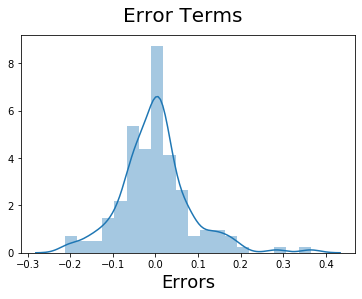

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Error terms seem to be approximately normally distributed, which is one of the major assumptions of linear regression

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions.

Applying the scaling on the test sets

In [66]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [67]:
df_test.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0
mean,0.209644,0.370121,0.371743,0.228835,0.667691,0.359521,0.486741,0.375212,0.887097,0.177419,...,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0
std,0.210911,0.179970,0.222354,0.188416,0.228484,0.252970,0.183964,0.208977,0.319058,0.385142,...,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.076536,0.265306,0.219125,0.126638,0.515873,0.140323,0.389764,0.221053,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
50%,0.136847,0.327988,0.344065,0.183406,0.674603,0.312903,0.475591,0.326316,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
75%,0.280049,0.482507,0.540726,0.287118,0.857143,0.432258,0.642126,0.421053,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0


In [68]:
#Dividing into X and y

y_test = df_test.pop('price')
X_test = df_test

In [69]:
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [70]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

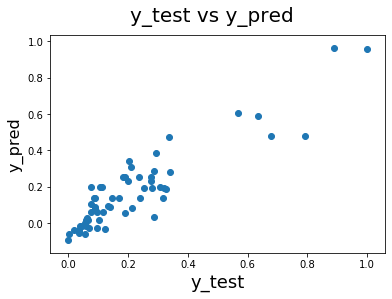

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Summary Statistics

In [74]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     193.5
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.55e-55
Time:                        22:31:14   Log-Likelihood:                 151.96
No. Observations:                 143   AIC:                            -293.9
Df Residuals:                     138   BIC:                            -279.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0165      0.033     -0.501      0.6

### Calculate the R-squared score on the test set.

In [75]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7782110598537595

## Final Statement:

### I feel it is a decent model, but I also acknowledge that we could do better. 

- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.
- With a low p-value and low VIF, these variables do describe the price of the automobiles to a good extent.